In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import Dataset
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from utils_train import *
import deepdish as dd
from configs import DatasetConfiguration
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
import seaborn as sb
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
import deepdish as dd
from glob import iglob
from natsort import natsorted

# %matplotlib widget
sb.set()

(0.65, 0.75)

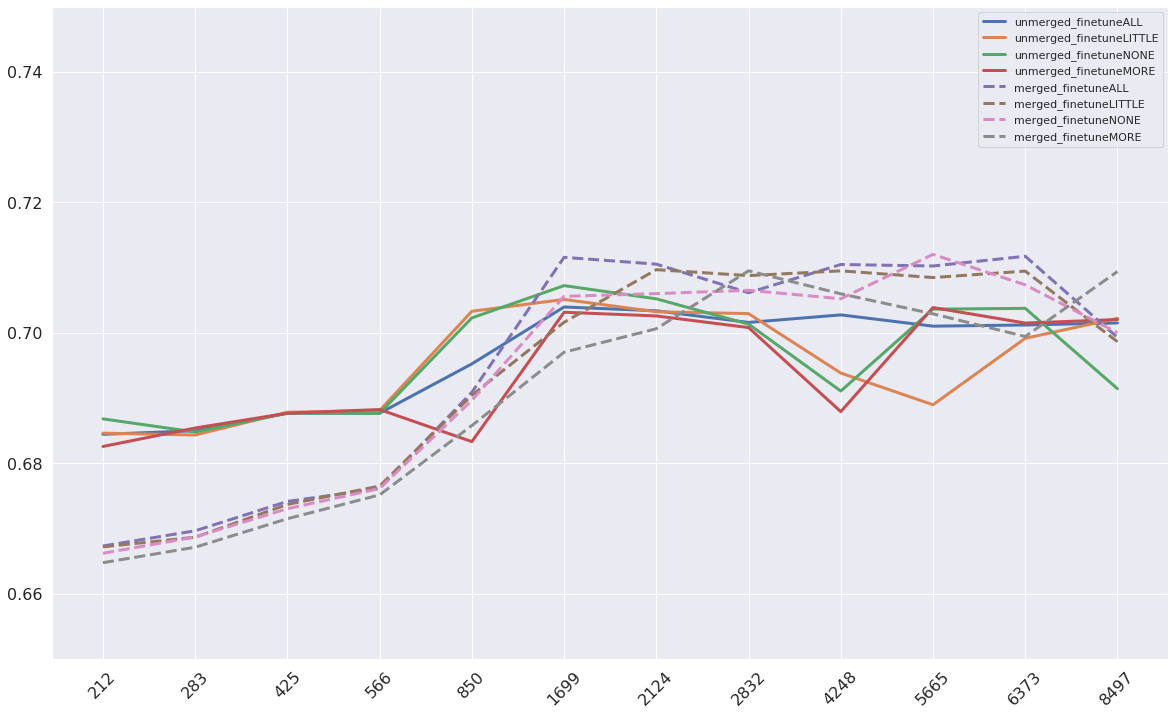

In [33]:
plt.figure(figsize=(20,12))

fnamelist = natsorted(list(iglob(f"{TEMP_DATADIR}/mergedFalse*")))

df = pd.DataFrame(pd.Series(fnamelist).apply(lambda x: x.split('/')[-1][:-4].split('_')))
df = df[0].apply(pd.Series)
df.columns = ['merged','frozen','nrlayers','shallowtrained','trial']
remove_one = False
summary = {}
settings = []
for i, sub in df.groupby(['merged','frozen','nrlayers']):
    setting = f"{sub.merged.unique()[0]}_{sub.frozen.unique()[0]}_{sub.nrlayers.unique()[0]}"
    if setting.endswith('nr5') and remove_one:
        continue
    settings.append(setting)
    summary[setting] = []
    for j, q in sub.iterrows():
        results = dd.io.load(f"{TEMP_DATADIR}/{q.merged}_{q.frozen}_{q.nrlayers}_TrShallowTrue_{q.trial}.csv")
        samples_results = {}
        for s in range(len(results)):
            samples_results[str(results[s]['nr_samples'])] = results[s]['balanced_accuracy_score']
        summary[setting].append(samples_results)
    
    tmp_df = pd.DataFrame(summary[setting])
    
    plt.plot(tmp_df.median(axis=0), linewidth=3)
tmpst = settings

fnamelist = natsorted(list(iglob(f"{TEMP_DATADIR}/mergedTrue*")))

df = pd.DataFrame(pd.Series(fnamelist).apply(lambda x: x.split('/')[-1][:-4].split('_')))
df = df[0].apply(pd.Series)
df.columns = ['merged','frozen','nrlayers','shallowtrained','trial']

summary = {}
settings = []
for i, sub in df.groupby(['merged','frozen','nrlayers']):
    setting = f"{sub.merged.unique()[0]}_{sub.frozen.unique()[0]}_{sub.nrlayers.unique()[0]}"
    if setting.endswith('nr5') and remove_one:
        continue
    settings.append(setting)
    summary[setting] = []
    for j, q in sub.iterrows():
        results = dd.io.load(f"{TEMP_DATADIR}/{q.merged}_{q.frozen}_{q.nrlayers}_TrShallowTrue_{q.trial}.csv")
        samples_results = {}
        for s in range(len(results)):
            samples_results[str(results[s]['nr_samples'])] = results[s]['balanced_accuracy_score']
        summary[setting].append(samples_results)
    
    tmp_df = pd.DataFrame(summary[setting])
    
    plt.plot(tmp_df.median(axis=0), linewidth=3, linestyle='dashed')
    plt.xticks(fontsize=16, rotation=45)
    plt.yticks(fontsize=16)

simple_labels = {}
all_labels = tmpst+settings
simple_labels['mergedFalse_frozenFalse_nr0'] = 'unmerged_finetuneALL'
simple_labels['mergedFalse_frozenTrue_nr15'] = 'unmerged_finetuneLITTLE'
simple_labels['mergedFalse_frozenTrue_nr19'] = 'unmerged_finetuneNONE'
simple_labels['mergedFalse_frozenTrue_nr5'] = 'unmerged_finetuneMORE'
simple_labels['mergedTrue_frozenFalse_nr0'] = 'merged_finetuneALL'
simple_labels['mergedTrue_frozenTrue_nr15'] = 'merged_finetuneLITTLE'
simple_labels['mergedTrue_frozenTrue_nr19'] = 'merged_finetuneNONE'
simple_labels['mergedTrue_frozenTrue_nr5'] = 'merged_finetuneMORE'

legend = [simple_labels.get(item,item)  for item in all_labels]

plt.legend(legend)
plt.ylim(0.65,0.75)

## Mean

(0.65, 0.75)

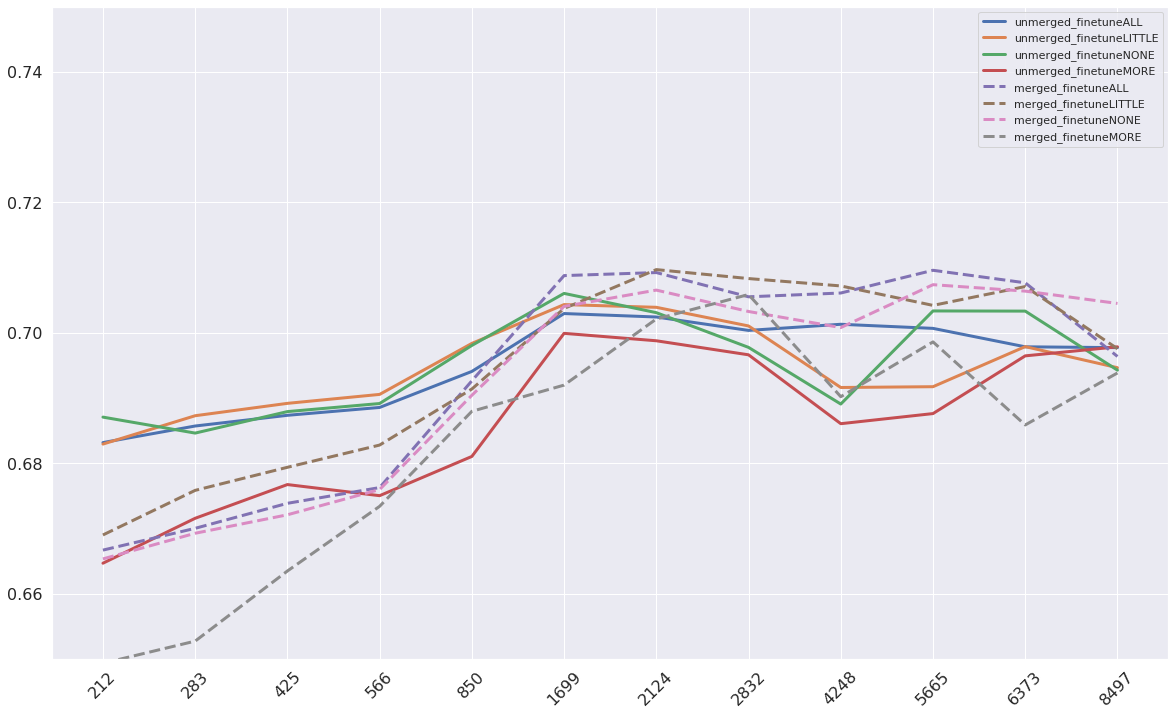

In [32]:
plt.figure(figsize=(20,12))

fnamelist = natsorted(list(iglob(f"{TEMP_DATADIR}/mergedFalse*")))

df = pd.DataFrame(pd.Series(fnamelist).apply(lambda x: x.split('/')[-1][:-4].split('_')))
df = df[0].apply(pd.Series)
df.columns = ['merged','frozen','nrlayers','shallowtrained','trial']
remove_one = False
summary = {}
settings = []
for i, sub in df.groupby(['merged','frozen','nrlayers']):
    setting = f"{sub.merged.unique()[0]}_{sub.frozen.unique()[0]}_{sub.nrlayers.unique()[0]}"
    if setting.endswith('nr5') and remove_one:
        continue
    settings.append(setting)
    summary[setting] = []
    for j, q in sub.iterrows():
        results = dd.io.load(f"{TEMP_DATADIR}/{q.merged}_{q.frozen}_{q.nrlayers}_TrShallowTrue_{q.trial}.csv")
        samples_results = {}
        for s in range(len(results)):
            samples_results[str(results[s]['nr_samples'])] = results[s]['balanced_accuracy_score']
        summary[setting].append(samples_results)
    
    tmp_df = pd.DataFrame(summary[setting])
    
    plt.plot(tmp_df.mean(axis=0), linewidth=3)
tmpst = settings

fnamelist = natsorted(list(iglob(f"{TEMP_DATADIR}/mergedTrue*")))

df = pd.DataFrame(pd.Series(fnamelist).apply(lambda x: x.split('/')[-1][:-4].split('_')))
df = df[0].apply(pd.Series)
df.columns = ['merged','frozen','nrlayers','shallowtrained','trial']

summary = {}
settings = []
for i, sub in df.groupby(['merged','frozen','nrlayers']):
    setting = f"{sub.merged.unique()[0]}_{sub.frozen.unique()[0]}_{sub.nrlayers.unique()[0]}"
    if setting.endswith('nr5') and remove_one:
        continue
    settings.append(setting)
    summary[setting] = []
    for j, q in sub.iterrows():
        results = dd.io.load(f"{TEMP_DATADIR}/{q.merged}_{q.frozen}_{q.nrlayers}_TrShallowTrue_{q.trial}.csv")
        samples_results = {}
        for s in range(len(results)):
            samples_results[str(results[s]['nr_samples'])] = results[s]['balanced_accuracy_score']
        summary[setting].append(samples_results)
    
    tmp_df = pd.DataFrame(summary[setting])
    
    plt.plot(tmp_df.mean(axis=0), linewidth=3, linestyle='dashed')
    plt.xticks(fontsize=16, rotation=45)
    plt.yticks(fontsize=16)

simple_labels = {}
all_labels = tmpst+settings
simple_labels['mergedFalse_frozenFalse_nr0'] = 'unmerged_finetuneALL'
simple_labels['mergedFalse_frozenTrue_nr15'] = 'unmerged_finetuneLITTLE'
simple_labels['mergedFalse_frozenTrue_nr19'] = 'unmerged_finetuneNONE'
simple_labels['mergedFalse_frozenTrue_nr5'] = 'unmerged_finetuneMORE'
simple_labels['mergedTrue_frozenFalse_nr0'] = 'merged_finetuneALL'
simple_labels['mergedTrue_frozenTrue_nr15'] = 'merged_finetuneLITTLE'
simple_labels['mergedTrue_frozenTrue_nr19'] = 'merged_finetuneNONE'
simple_labels['mergedTrue_frozenTrue_nr5'] = 'merged_finetuneMORE'

legend = [simple_labels.get(item,item)  for item in all_labels]

plt.legend(legend)
plt.ylim(0.65,0.75)

### One choice of merged/notmerged

(0.65, 0.75)

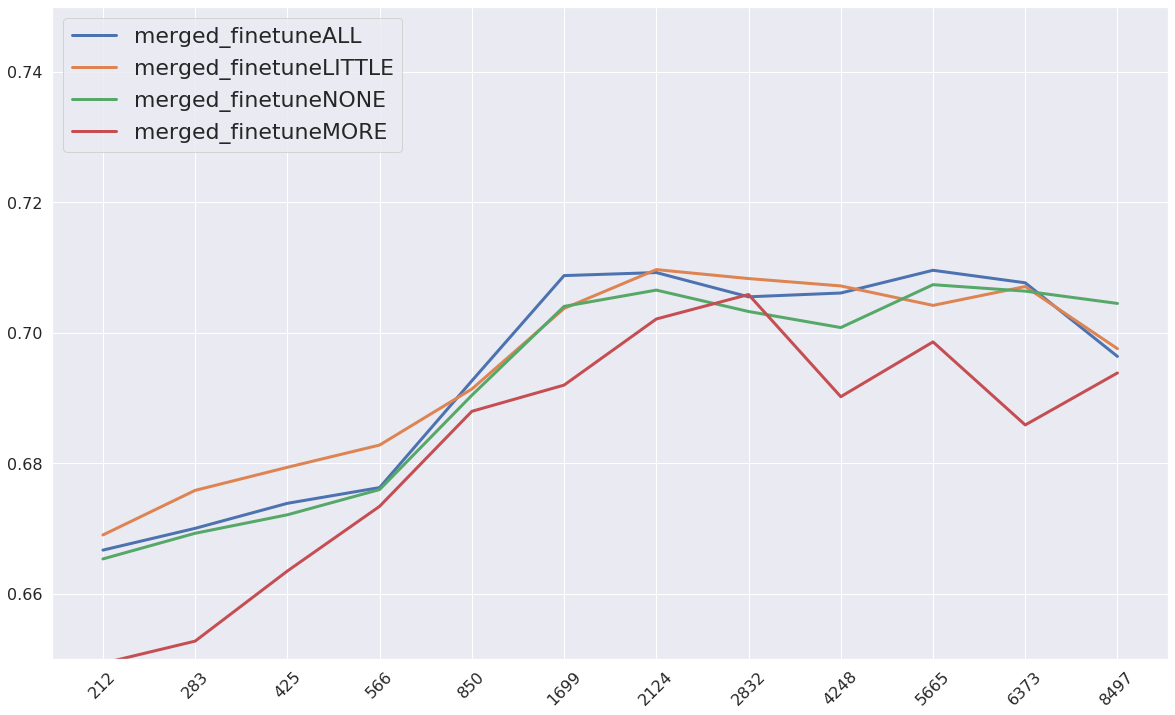

In [31]:
plt.figure(figsize=(20,12))

fnamelist = natsorted(list(iglob(f"{TEMP_DATADIR}/mergedTrue*")))

df = pd.DataFrame(pd.Series(fnamelist).apply(lambda x: x.split('/')[-1][:-4].split('_')))
df = df[0].apply(pd.Series)
df.columns = ['merged','frozen','nrlayers','shallowtrained','trial']

summary = {}
settings = []
for i, sub in df.groupby(['merged','frozen','nrlayers']):
    setting = f"{sub.merged.unique()[0]}_{sub.frozen.unique()[0]}_{sub.nrlayers.unique()[0]}"
    if setting.endswith('nr5') and remove_one:
        continue
    settings.append(setting)
    summary[setting] = []
    for j, q in sub.iterrows():
        results = dd.io.load(f"{TEMP_DATADIR}/{q.merged}_{q.frozen}_{q.nrlayers}_TrShallowTrue_{q.trial}.csv")
        samples_results = {}
        for s in range(len(results)):
            samples_results[str(results[s]['nr_samples'])] = results[s]['balanced_accuracy_score']
        summary[setting].append(samples_results)
    
    tmp_df = pd.DataFrame(summary[setting])
    
    plt.plot(tmp_df.mean(axis=0), linewidth=3)
    plt.xticks(fontsize=16, rotation=45)
    plt.yticks(fontsize=16)

simple_labels = {}
all_labels = settings
simple_labels['mergedFalse_frozenFalse_nr0'] = 'unmerged_finetuneALL'
simple_labels['mergedFalse_frozenTrue_nr15'] = 'unmerged_finetuneLITTLE'
simple_labels['mergedFalse_frozenTrue_nr19'] = 'unmerged_finetuneNONE'
simple_labels['mergedFalse_frozenTrue_nr5'] = 'unmerged_finetuneMORE'
simple_labels['mergedTrue_frozenFalse_nr0'] = 'merged_finetuneALL'
simple_labels['mergedTrue_frozenTrue_nr15'] = 'merged_finetuneLITTLE'
simple_labels['mergedTrue_frozenTrue_nr19'] = 'merged_finetuneNONE'
simple_labels['mergedTrue_frozenTrue_nr5'] = 'merged_finetuneMORE'

legend = [simple_labels.get(item,item)  for item in all_labels]

plt.legend(legend, loc=2, prop={'size': 22})
plt.ylim(0.65,0.75)

### Examining one setting

In [56]:
sub # for last setting in loop

,merged,frozen,nrlayers,shallowtrained,trial
0,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial0
1,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial1
2,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial2
3,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial3
4,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial4
5,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial5
6,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial6
7,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial7
8,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial8
9,mergedTrue,frozenFalse,nr0,TrShallowTrue,trial9


(0.65, 0.725)

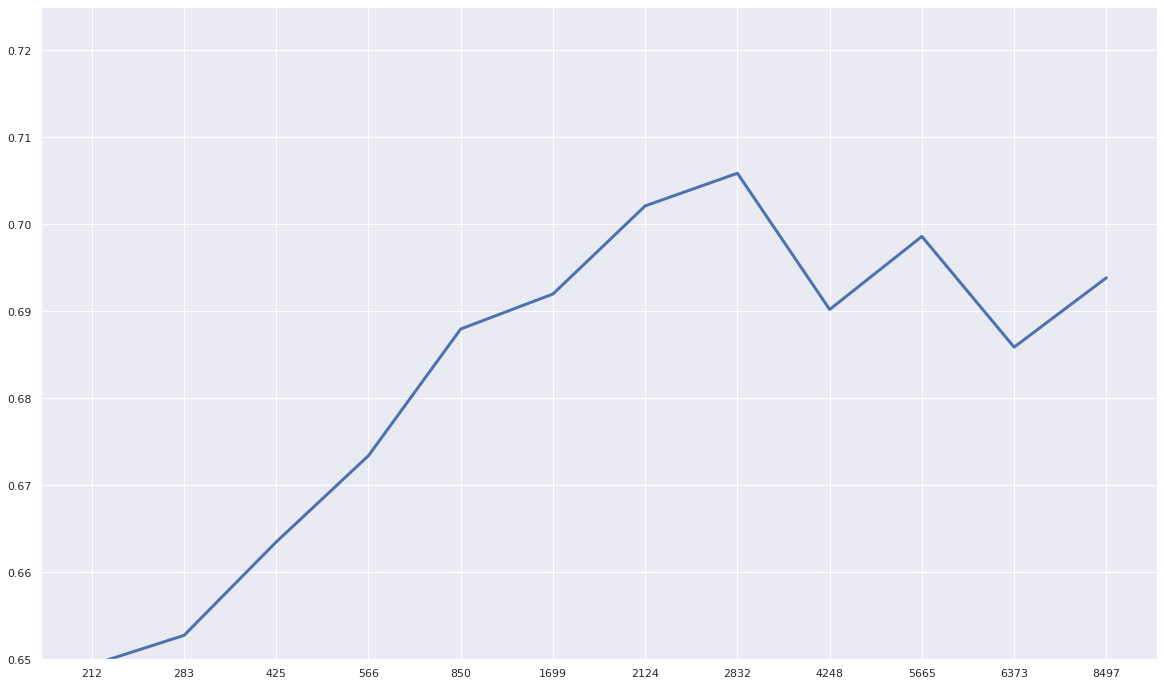

In [95]:
plt.figure(figsize=(20,12))
plt.plot(pd.DataFrame(summary[setting]).mean(axis=0), linewidth=3)
plt.ylim(0.65,0.725)

(0.5, 0.725)

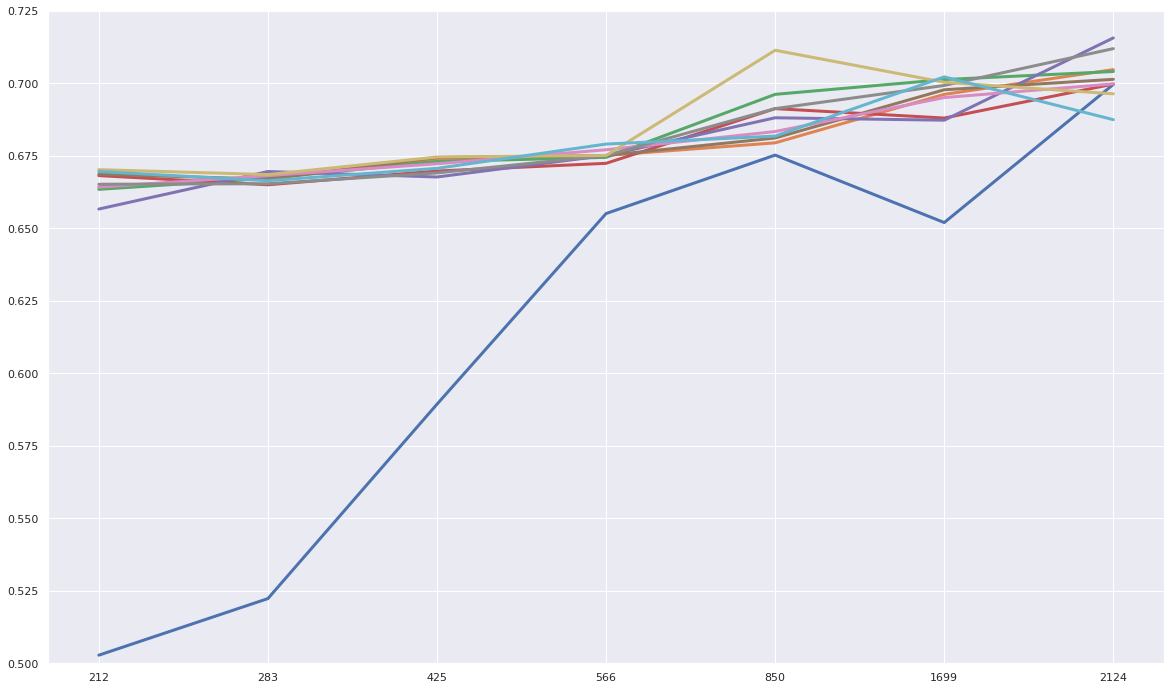

In [67]:
plt.figure(figsize=(20,12))
plt.plot(tmp_df.T, linewidth=3)
plt.ylim(0.5,0.725)

In [39]:
fnamelist = natsorted(list(iglob(f"{TEMP_DATADIR}/mergedFalse*")))

df = pd.DataFrame(pd.Series(fnamelist).apply(lambda x: x.split('/')[-1][:-4].split('_')))
df = df[0].apply(pd.Series)
df.columns = ['merged','frozen','nrlayers','shallowtrained','trial']

summary = {}
settings = []
for i, sub in df.groupby(['merged','frozen','nrlayers']):
    setting = f"{sub.merged.unique()[0]}_{sub.frozen.unique()[0]}_{sub.nrlayers.unique()[0]}"
    settings.append(setting)
    summary[setting] = []
    for j, q in sub.iterrows():
        results = dd.io.load(f"{TEMP_DATADIR}/{q.merged}_{q.frozen}_{q.nrlayers}_TrShallowTrue_{q.trial}.csv")
        samples_results = {}
        for s in range(len(results)):
            samples_results[str(results[s]['nr_samples'])] = results[s]['cm']
        summary[setting].append(samples_results)
    
    tmp_df = pd.DataFrame(summary[setting])
    break

In [100]:
cms = []
for s in range(tmp_df.shape[1]):
    a=tmp_df.iloc[:,s].apply(lambda x: x[0]).mean()
    b=tmp_df.iloc[:,s].apply(lambda x: x[1]).mean()
    
    cms.append(np.vstack((a,b)))

In [107]:
# tmp_df.iloc[:,s].apply(lambda x: x[0]).mean()

array([449., 222.])

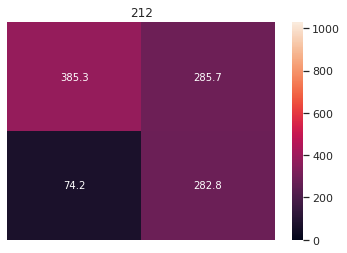

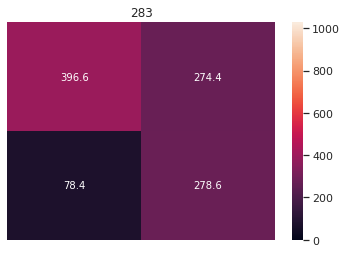

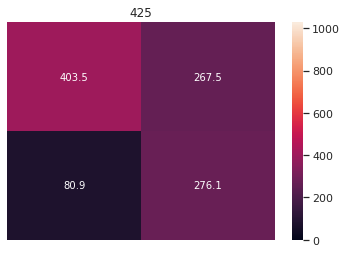

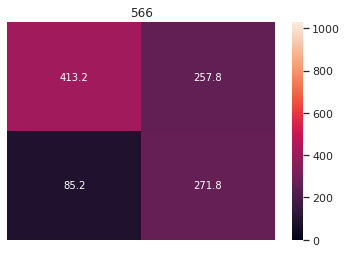

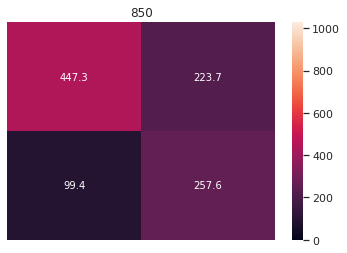

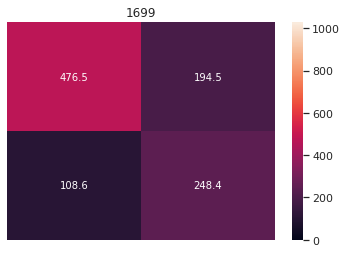

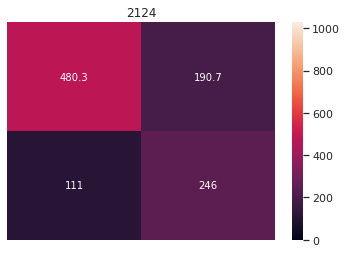

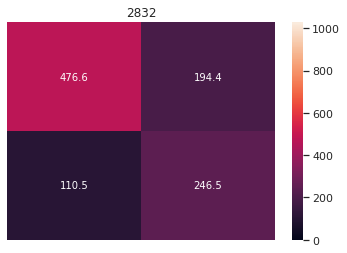

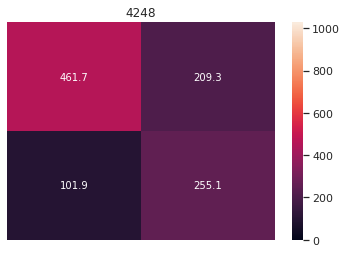

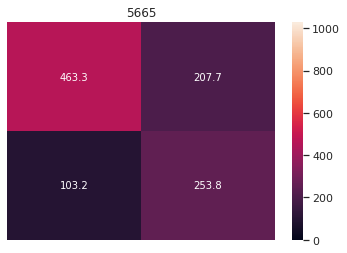

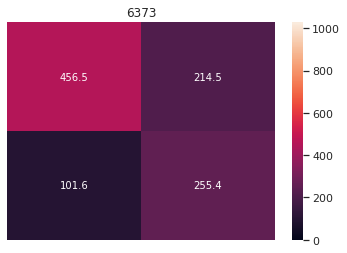

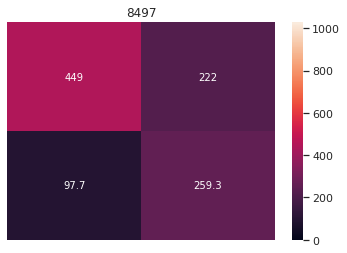

In [108]:

for i,mat in enumerate(cms):
    plt.figure()
    sb.heatmap(mat, annot=True, fmt='g', vmin=0, vmax=1028, cbar=True, xticklabels=False, yticklabels=False)
    plt.title(tmp_df.columns.tolist()[i])
    plt.savefig(f'/home/kalfasyan/Desktop/{tmp_df.columns.tolist()[i]}_confmat.jpg',bbox_inches = 'tight',pad_inches = 0 )